In [0]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import pandas as pd
from __future__ import absolute_import, division, print_function, unicode_literals
import functools
from sklearn.model_selection import train_test_split
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt


In [0]:
#Reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/gokul-bhoomi/Heart-Disease-Prediction-Using-ANN/master/heartdataset.csv')

x = data.iloc[:,:-1].values
y = data.iloc[:,13].values



In [0]:
#Creating placeholder

def create_placeholders(n_x,n_y):
  X=tf.placeholder(tf.float32,[n_x,None],"X");
  Y=tf.placeholder(tf.float32,[n_y,None],"Y");
  return X,Y;

#Intializing Parameters

def initialize_parameters():
  W1 = tf.get_variable("W1",[20,13],initializer=tf.contrib.layers.xavier_initializer());
  b1 = tf.get_variable("b1",[20,1],initializer=tf.zeros_initializer());
  W2 = tf.get_variable("W2",[15,20],initializer=tf.contrib.layers.xavier_initializer());
  b2 = tf.get_variable("b2",[15,1],initializer=tf.zeros_initializer());
  W3 = tf.get_variable("W3",[13,15],initializer=tf.contrib.layers.xavier_initializer());
  b3 = tf.get_variable("b3",[13,1],initializer=tf.zeros_initializer());
  W4 = tf.get_variable("W4",[15,13],initializer=tf.contrib.layers.xavier_initializer());
  b4 = tf.get_variable("b4",[15,1],initializer=tf.zeros_initializer());
  W5 = tf.get_variable("W5",[10,15],initializer=tf.contrib.layers.xavier_initializer());
  b5 = tf.get_variable("b5",[10,1],initializer=tf.zeros_initializer());
  W6 = tf.get_variable("W6",[5,10],initializer=tf.contrib.layers.xavier_initializer());
  b6 = tf.get_variable("b6",[5,1],initializer=tf.zeros_initializer());
  W7 = tf.get_variable("W7",[2,5],initializer=tf.contrib.layers.xavier_initializer());
  b7 = tf.get_variable("b7",[2,1],initializer=tf.zeros_initializer());

  parameters = {  "W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4,
                  "W5": W5,
                  "b5": b5,
                  "W6": W6,
                  "b6": b6,
                  "W7": W7,
                  "b7": b7
               }
  return parameters;


#Forward Propagation 

def forward_propagation(X,parameters):
  
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    W5 = parameters['W5']
    b5 = parameters['b5']
    W6 = parameters['W6']
    b6 = parameters['b6']
    W7 = parameters['W7']
    b7 = parameters['b7']

    #layer 1
    Z1=tf.add(tf.matmul(W1,X),b1); 
    A1=tf.nn.relu(Z1);     #Relu

    #layer 2
    Z2=tf.add(tf.matmul(W2,A1),b2);
    A2=tf.nn.relu(Z2);     #Relu

    #layer 3
    Z3=tf.add(tf.matmul(W3,A2),b3);
    A3=tf.nn.relu(Z3);    #Relu

    #layer 4
    Z4=tf.add(tf.matmul(W4,A3),b4);
    A4=tf.nn.relu(Z4);    #Relu

    #layer 5
    Z5=tf.add(tf.matmul(W5,A4),b5);
    A5=tf.nn.relu(Z5);

    Z6=tf.add(tf.matmul(W6,A5),b6);
    A6=tf.nn.relu(Z6);
    
    Z7=tf.add(tf.matmul(W7,A6),b7);

    return Z7;


#cost

def compute_cost(Z7,Y):
  label=Y;
  logit=Z7;
  cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=label))
  return cost;








 The Cost after  100  Epochs is  0.638032

 The Cost after  200  Epochs is  0.59420586

 The Cost after  300  Epochs is  0.5745327

 The Cost after  400  Epochs is  0.5548196

 The Cost after  500  Epochs is  0.52278495

 The Cost after  600  Epochs is  0.45816818

 The Cost after  700  Epochs is  0.42756864

 The Cost after  800  Epochs is  0.3972565

 The Cost after  900  Epochs is  0.3887134

 The Cost after  1000  Epochs is  0.36310107

 The Cost after  1100  Epochs is  0.35257128

 The Cost after  1200  Epochs is  0.34397528

 The Cost after  1300  Epochs is  0.33838016

 The Cost after  1400  Epochs is  0.32735792

 The Cost after  1500  Epochs is  0.3196519

 The Cost after  1600  Epochs is  0.3145196

 The Cost after  1700  Epochs is  0.31003222

 The Cost after  1800  Epochs is  0.3065751

 The Cost after  1900  Epochs is  0.29728246

 The Cost after  2000  Epochs is  0.29565945

 The Cost after  2100  Epochs is  0.29416487

 The Cost after  2200  Epochs is  0.28099972

 The 

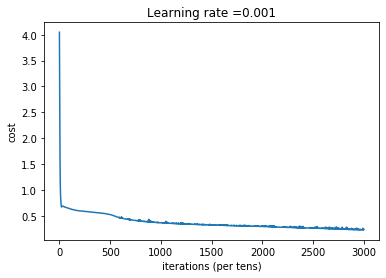

Train Accuracy: 92 %
Test Accuracy: 83 %


In [101]:
#Training function 

def train(x_train,y_train,x_test,y_test,epochs,learning_rate):
  n_x,m = x_train.shape
  n_y = y_train.shape[0]
  costs=[]
  ops.reset_default_graph()

  X,Y=create_placeholders(n_x,n_y); #creating placeholders

  parameters=initialize_parameters() # intialising parameters

  Z7=forward_propagation(X,parameters) # forward propagation

  cost=compute_cost(Z7,Y) # computing cost
  
  

  optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost); #Using Adam Optimizer


  init=tf.global_variables_initializer(); # Initialize All variables

  with tf.Session() as sess:
    sess.run(init)
    
    


    for i in range(epochs):
      
      _,batch_cost=sess.run([optimizer,cost],feed_dict={X:x_train,Y:y_train});
      
      if((i+1)%100==0):
        print("\n The Cost after ",i+1," Epochs is " ,batch_cost);
      
      costs.append(batch_cost)
      
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()     
    parameters=sess.run(parameters)
    

    correct_prediction = tf.equal(tf.argmax(Z7), tf.argmax(Y))

    
    #Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Train Accuracy:", int((accuracy.eval({X: x_train, Y: y_train}))*100),"%")

    print("Test Accuracy:", int((accuracy.eval({X: x_test, Y: y_test}))*100),"%")
  
  
  return parameters
 
 

#splitting and pre processing the dataset

#Normalising the input data
tf.keras.utils.normalize(x,order=2)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

y1=tf.one_hot(y_train,depth=2,axis=0)
y2=tf.one_hot(y_test,depth=2,axis=0)
y1=tf.reshape(y1,(2,272))
y2=tf.reshape(y2,(2,31))

sess = tf.Session()
y1 = sess.run(y1)
y2 = sess.run(y2)
sess.close()

#train the model
parameters=train(x_train.T,y1,x_test.T,y2,3000,0.001);








